In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('predictive_maintenance.csv')

In [3]:
df.sample(7)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
6925,6926,M21785,M,301.1,311.6,1266,55.5,210,0,No Failure
7043,7044,M21903,M,300.7,310.6,2006,19.1,102,0,No Failure
1711,1712,L48891,L,298.2,307.8,1355,51.3,70,0,No Failure
6853,6854,L54033,L,300.9,311.1,1417,40.7,24,0,No Failure
2626,2627,L49806,L,299.7,309.4,1650,29.8,93,0,No Failure
4185,4186,L51365,L,302.2,310.6,1348,48.4,161,1,Heat Dissipation Failure
4687,4688,L51867,L,303.5,311.6,2183,17.0,110,0,No Failure


In [5]:
df.drop(columns=['Target'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 703.3+ KB


In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000


In [9]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[', '')

In [11]:
df.columns = df.columns.str.replace(']', '')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Product_ID             10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   Air_temperature_K      10000 non-null  float64
 4   Process_temperature_K  10000 non-null  float64
 5   Rotational_speed_rpm   10000 non-null  int64  
 6   Torque_Nm              10000 non-null  float64
 7   Tool_wear_min          10000 non-null  int64  
 8   Failure_Type           10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 703.3+ KB


In [14]:
df.Failure_Type=df.Failure_Type.astype('category')

<Axes: >

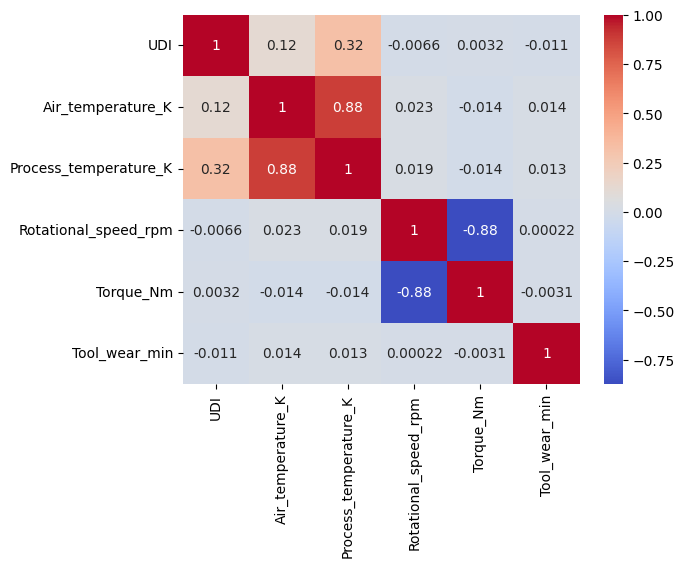

In [16]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

<Axes: xlabel='Torque_Nm', ylabel='Rotational_speed_rpm'>

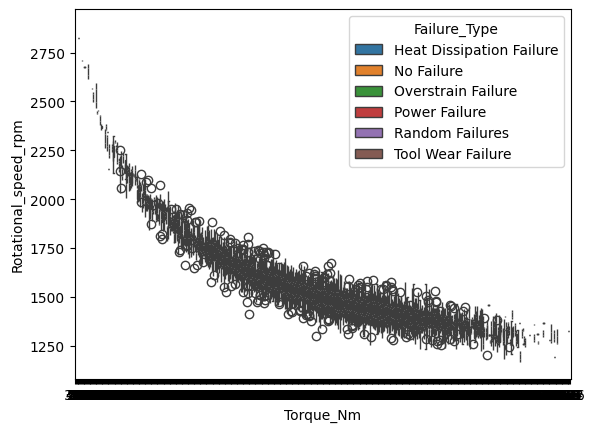

In [27]:
sns.boxplot(data=df,x='Torque_Nm',y='Rotational_speed_rpm',hue='Failure_Type')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   UDI                    10000 non-null  int64   
 1   Product_ID             10000 non-null  object  
 2   Type                   10000 non-null  object  
 3   Air_temperature_K      10000 non-null  float64 
 4   Process_temperature_K  10000 non-null  float64 
 5   Rotational_speed_rpm   10000 non-null  int64   
 6   Torque_Nm              10000 non-null  float64 
 7   Tool_wear_min          10000 non-null  int64   
 8   Failure_Type           10000 non-null  category
dtypes: category(1), float64(3), int64(3), object(2)
memory usage: 635.1+ KB


In [29]:
df

,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


In [30]:
df.Failure_Type.value_counts()

Failure_Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [31]:
df[df.Failure_Type!='No Failure'].shape

(348, 9)

* *No Failure*: 9652 
* *Failure*: 348 

In [32]:
df.Type.nunique()

3

* Type: 3


In [33]:
df.Type=df.Type.astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   UDI                    10000 non-null  int64   
 1   Product_ID             10000 non-null  object  
 2   Type                   10000 non-null  category
 3   Air_temperature_K      10000 non-null  float64 
 4   Process_temperature_K  10000 non-null  float64 
 5   Rotational_speed_rpm   10000 non-null  int64   
 6   Torque_Nm              10000 non-null  float64 
 7   Tool_wear_min          10000 non-null  int64   
 8   Failure_Type           10000 non-null  category
dtypes: category(2), float64(3), int64(3), object(1)
memory usage: 566.9+ KB


In [35]:
df.drop(columns=['Product_ID'],inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   UDI                    10000 non-null  int64   
 1   Type                   10000 non-null  category
 2   Air_temperature_K      10000 non-null  float64 
 3   Process_temperature_K  10000 non-null  float64 
 4   Rotational_speed_rpm   10000 non-null  int64   
 5   Torque_Nm              10000 non-null  float64 
 6   Tool_wear_min          10000 non-null  int64   
 7   Failure_Type           10000 non-null  category
dtypes: category(2), float64(3), int64(3)
memory usage: 488.8 KB


<Axes: >

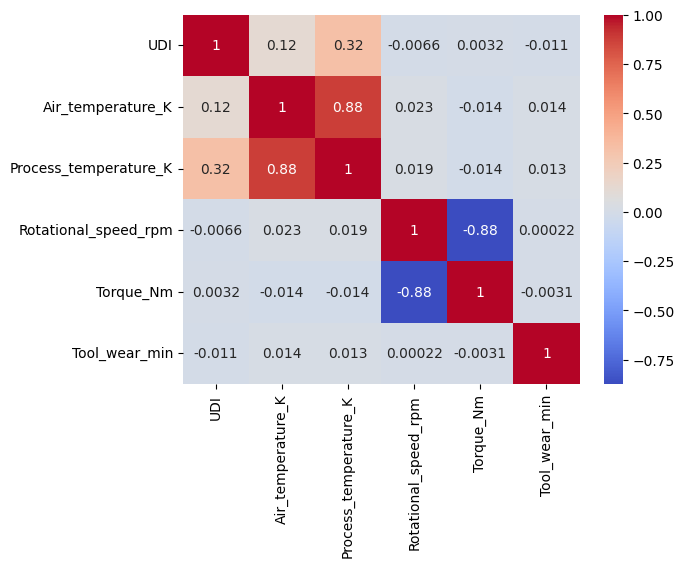

In [37]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

* Removed Product_ID, useless for me


In [40]:
df.columns = df.columns.str.lower()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   udi                    10000 non-null  int64   
 1   type                   10000 non-null  category
 2   air_temperature_k      10000 non-null  float64 
 3   process_temperature_k  10000 non-null  float64 
 4   rotational_speed_rpm   10000 non-null  int64   
 5   torque_nm              10000 non-null  float64 
 6   tool_wear_min          10000 non-null  int64   
 7   failure_type           10000 non-null  category
dtypes: category(2), float64(3), int64(3)
memory usage: 488.8 KB


<Axes: xlabel='air_temperature_k', ylabel='process_temperature_k'>

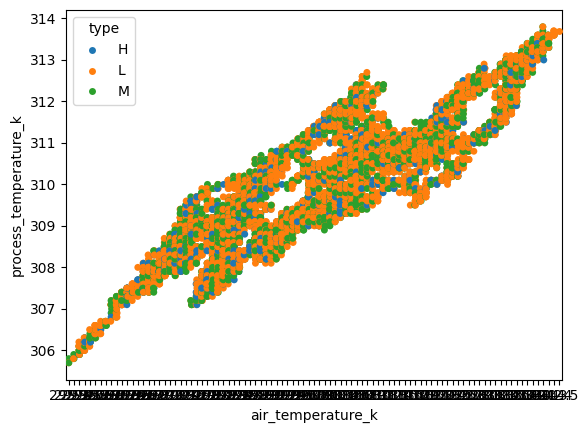

In [42]:
sns.stripplot(x='air_temperature_k',y='process_temperature_k',hue='type',data=df)

<Axes: xlabel='process_temperature_k', ylabel='air_temperature_k'>

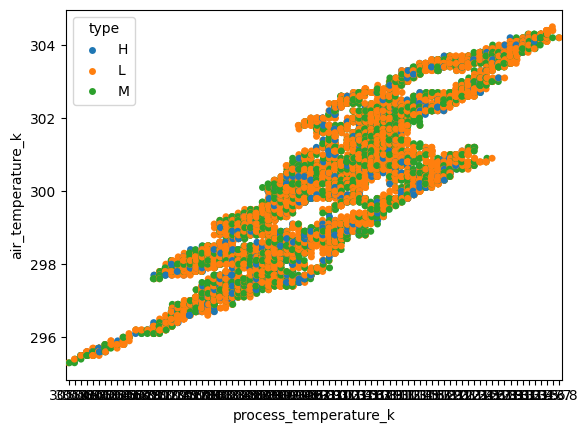

In [43]:
sns.stripplot(y='air_temperature_k',x='process_temperature_k',hue='type',data=df)


<Axes: xlabel='rotational_speed_rpm', ylabel='torque_nm'>

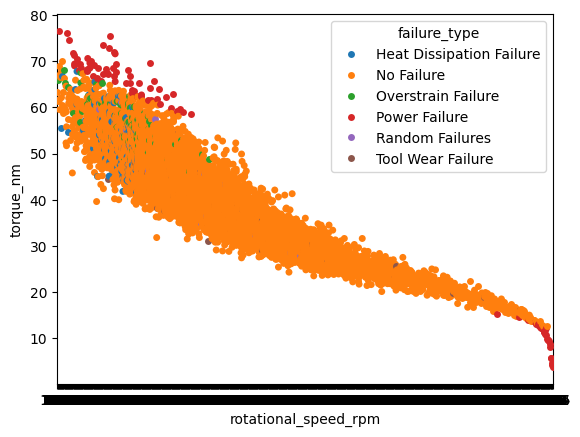

In [46]:
sns.stripplot(x='rotational_speed_rpm',y='torque_nm',hue='failure_type',data=df,dodge=True)

In [47]:
df.drop(columns=['udi'],inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   type                   10000 non-null  category
 1   air_temperature_k      10000 non-null  float64 
 2   process_temperature_k  10000 non-null  float64 
 3   rotational_speed_rpm   10000 non-null  int64   
 4   torque_nm              10000 non-null  float64 
 5   tool_wear_min          10000 non-null  int64   
 6   failure_type           10000 non-null  category
dtypes: category(2), float64(3), int64(2)
memory usage: 410.6 KB


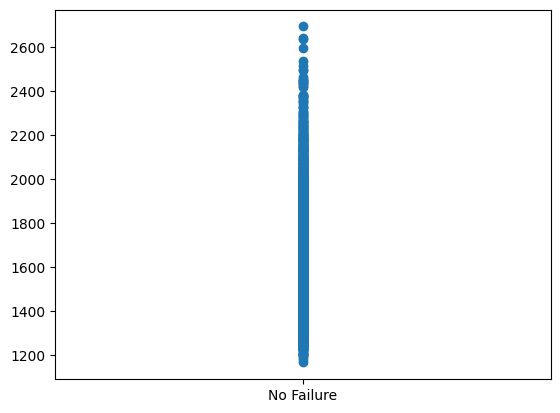

In [49]:
# plt.figure(figsize=(18,10))
# plt.plot(df[df.failure_type!='No Failure'].failure_type,df[df.failure_type!='No Failure'].rotational_speed_rpm,'o')

plt.plot(df[df.failure_type=='No Failure'].failure_type,df[df.failure_type=='No Failure'].rotational_speed_rpm,'o')

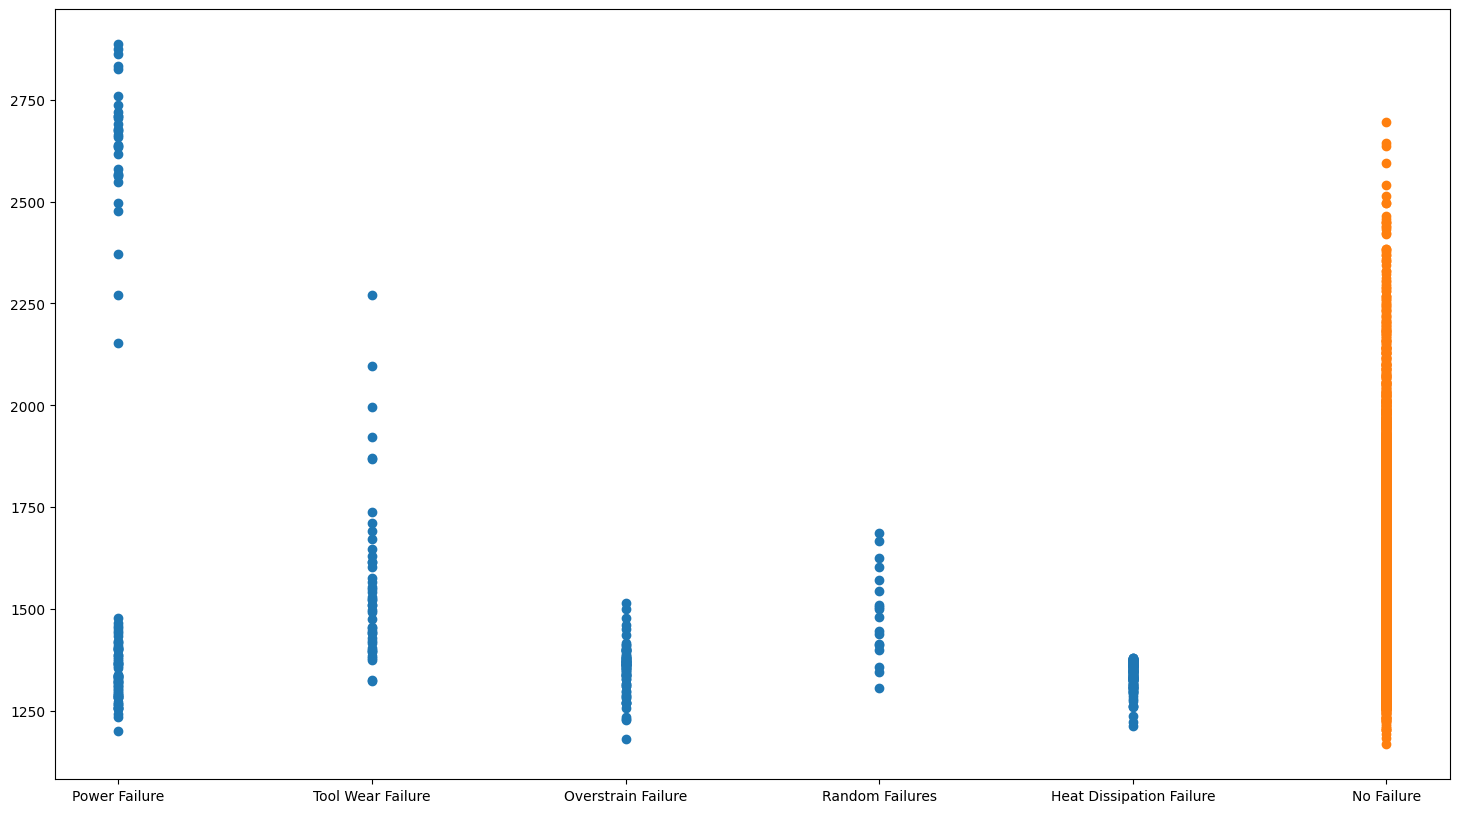

In [53]:
plt.figure(figsize=(18,10))
plt.plot(df[df.failure_type!='No Failure'].failure_type,df[df.failure_type!='No Failure'].rotational_speed_rpm,'o')

plt.plot(df[df.failure_type=='No Failure'].failure_type,df[df.failure_type=='No Failure'].rotational_speed_rpm,'o')

* *Power* *Failure* -> rotational_speed 2500rpm+
* *Tool* *Wear* *Failure* might occurs when the rotational speed stays between 1300-1750.
* *Overstrain* *Failure* might occurs when the rotational speed stays between 1200-1500.
* *Heat* *Dissipation* *Failure* occurs when the rotational speed stays between 1150-1350.

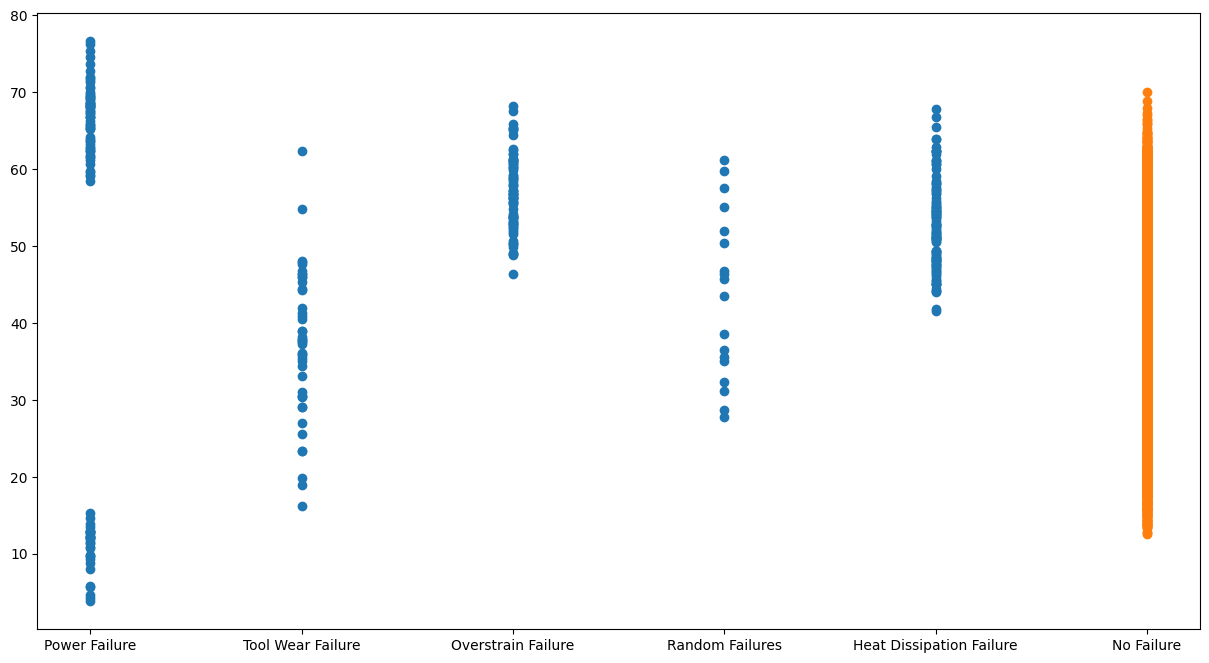

In [56]:
plt.figure(figsize=(15,8))
plt.plot(df[df.failure_type!='No Failure'].failure_type,df[df.failure_type!='No Failure'].torque_nm,'o')

plt.plot(df[df.failure_type=='No Failure'].failure_type,df[df.failure_type=='No Failure'].torque_nm,'o')

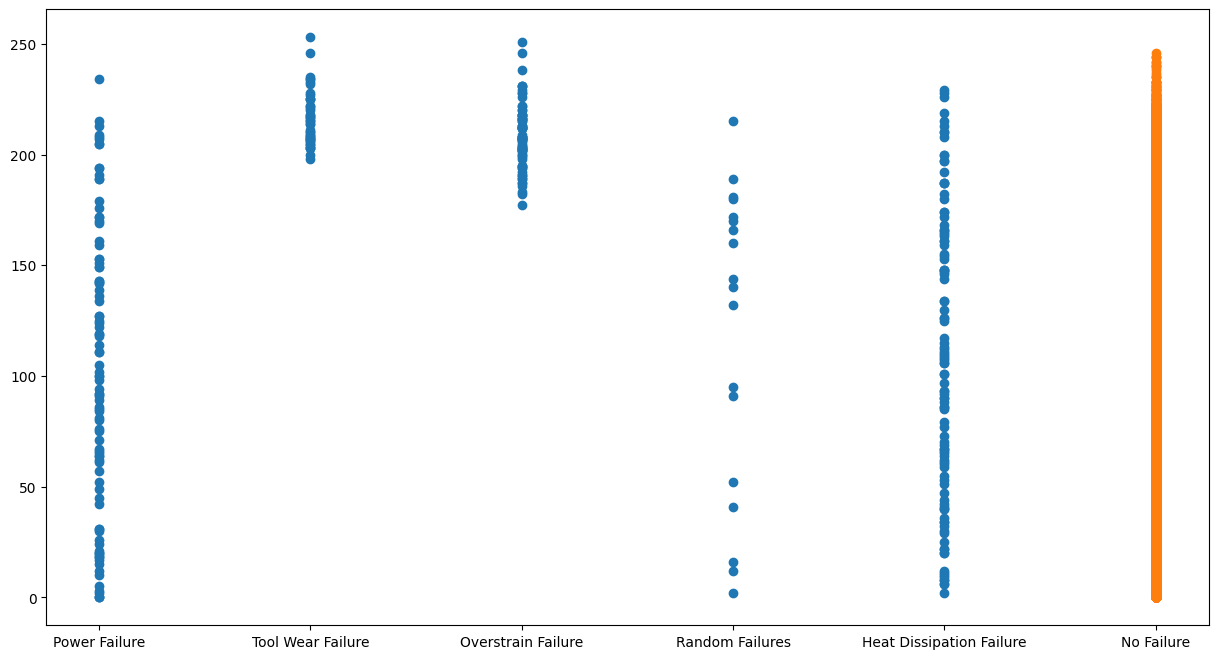

In [57]:
plt.figure(figsize=(15,8))
plt.plot(df[df.failure_type!='No Failure'].failure_type,df[df.failure_type!='No Failure'].tool_wear_min,'o')

plt.plot(df[df.failure_type=='No Failure'].failure_type,df[df.failure_type=='No Failure'].tool_wear_min,'o')

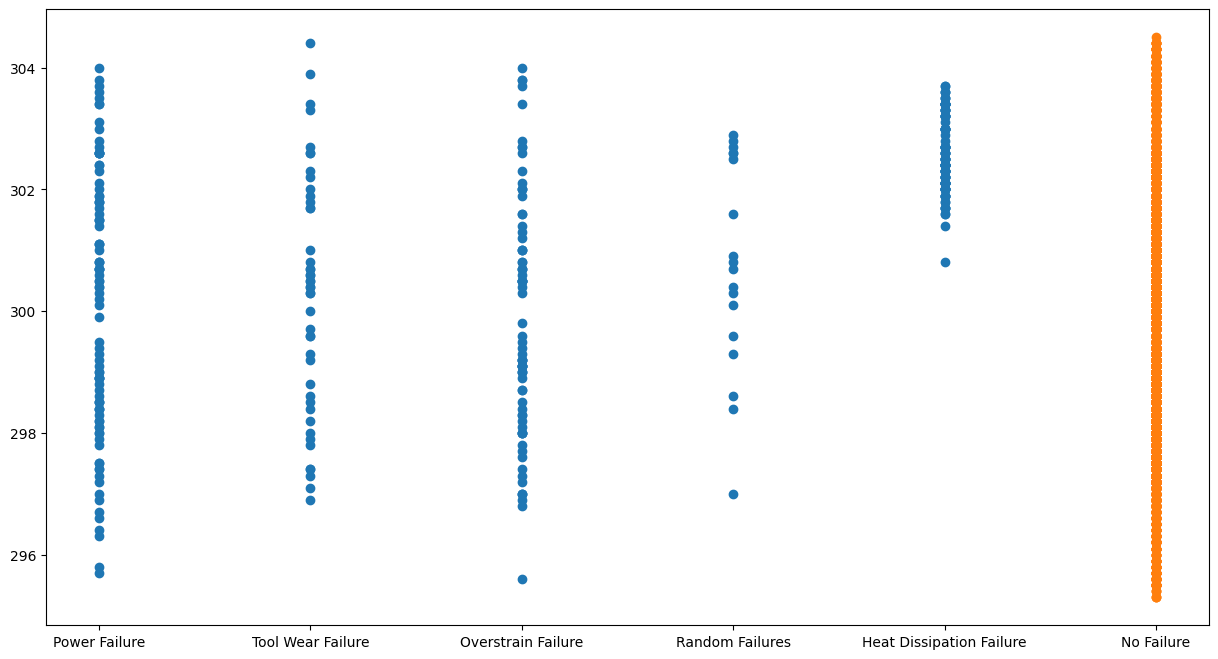

In [58]:
plt.figure(figsize=(15,8))
plt.plot(df[df.failure_type!='No Failure'].failure_type,df[df.failure_type!='No Failure'].air_temperature_k,'o')

plt.plot(df[df.failure_type=='No Failure'].failure_type,df[df.failure_type=='No Failure'].air_temperature_k,'o')

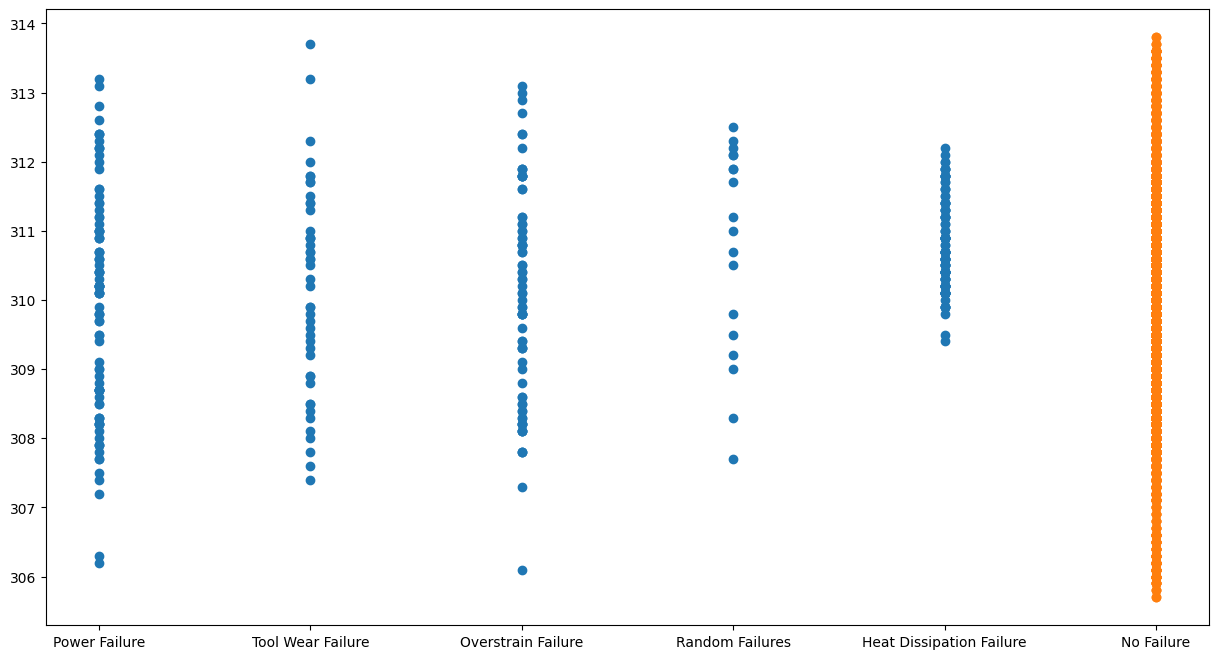

In [59]:
plt.figure(figsize=(15,8))
plt.plot(df[df.failure_type!='No Failure'].failure_type,df[df.failure_type!='No Failure'].process_temperature_k,'o')

plt.plot(df[df.failure_type=='No Failure'].failure_type,df[df.failure_type=='No Failure'].process_temperature_k,'o')

In [ ]:
import 